Full name: Lastname, Firstname

Perm number: 

Change the filename to HW9_ followed by your last name and first name with an underscore between them. For example, Abraham Lincoln's homework filename would be "HW9_Lincoln_Abraham.ipynb"

### **Week 9, Homework**

---

#### Problem 1 (3 pt) 

#### **Ring attractor model with turning velocity**

The equation of a ring attractor with turning signal is shown below. This equation simulates the situation when the animal turns in a complete darkness. The turning velocity (the motor command) will be copied fed into the compass system and the compass would move.

<center>$ \tau\displaystyle\frac{\partial f_n}{\partial t} = -f_n+\bigg[  \alpha f_n + D( f_{n+1}+ f_{n-1} -2f_n) - \beta \sum_{m=0}^{N-1}f_m +1 - \displaystyle\frac{v(f_{n+1}- f_{n-1})}{2} \bigg]_+$ </center>

All parameters are the same as those introduced in the lecture<br>
$v$ is the angular velocity (i.e., turning velocity) of the animal. This is a motor signal, copied from motor system to the compass system. In this simulation, set $v=0.3$<br>

Write an ODE function that simulates compass neurons when the animal turns and changes its body orientation in the darkness.

The output should look like below:
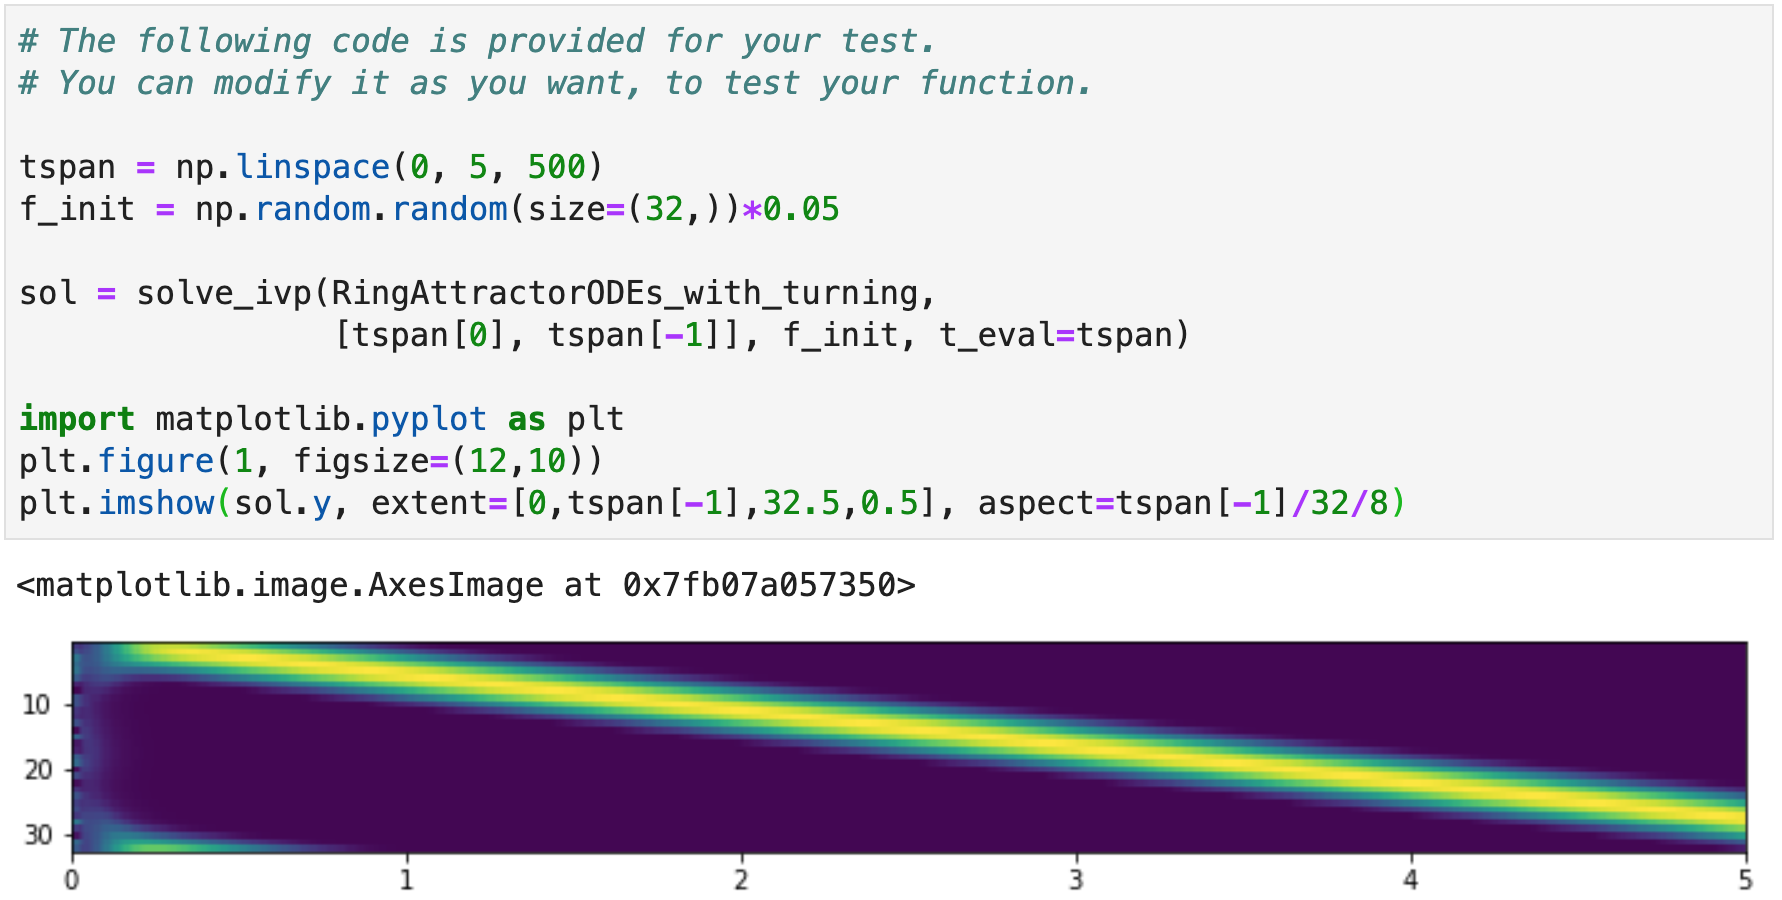

The exact position of the yellow band may shift across simulations, but it should change its position over time as shown in the figure.

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!


# Packages to import
import numpy as np
from scipy.integrate import solve_ivp

def RingAttractorODEs_with_turning(t,f):
    
    v = 0.3 # some number between -0.3 and +0.3 works good
    
    tau = 0.05
    alpha = 2.6183
    beta = 1.9635
    D = 5.1876
    
    tmp = alpha*f + D*(np.roll(f,-1)+np.roll(f,1)-2*f) - beta*sum(f)  + 1  -v*(np.roll(f,-1)-np.roll(f,1))/2
    tmp[tmp<0] = 0
    
    dfdt = (  -f + tmp )/tau
    
    return dfdt

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

tspan = np.linspace(0, 5, 500)
f_init = np.random.random(size=(32,))*0.05

sol = solve_ivp(RingAttractorODEs_with_turning,
                [tspan[0], tspan[-1]], f_init, t_eval=tspan)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(12,10))
plt.imshow(sol.y, extent=[0,tspan[-1],32.5,0.5], aspect=tspan[-1]/32/8)

---

#### Problem 2 (2 pt)  

#### **Shrub total carbon calculation**

A scientist is interested in the carbon storage of shrubs. She collected preliminary data and saved it into "shrub-volume-data.csv". It contains a few columns including shrub's width, length, and height.

The total carbon of each shrub is calculated using the following equation.

<center>$volume = length * width * height$</center><br>

<center>$total carbon = 1.8 + 2 * log(volume)$</center><br>


Make a function `shrub_carbon` that calculates `volume` and `total carbon`.

1. This function receives a pandas dataframe containing columns of height, width, and length.

2. Write code to add a new column with `volume` information

3. Write code to add another new column with `total carbon` information

The outcome of this problem should look like below:
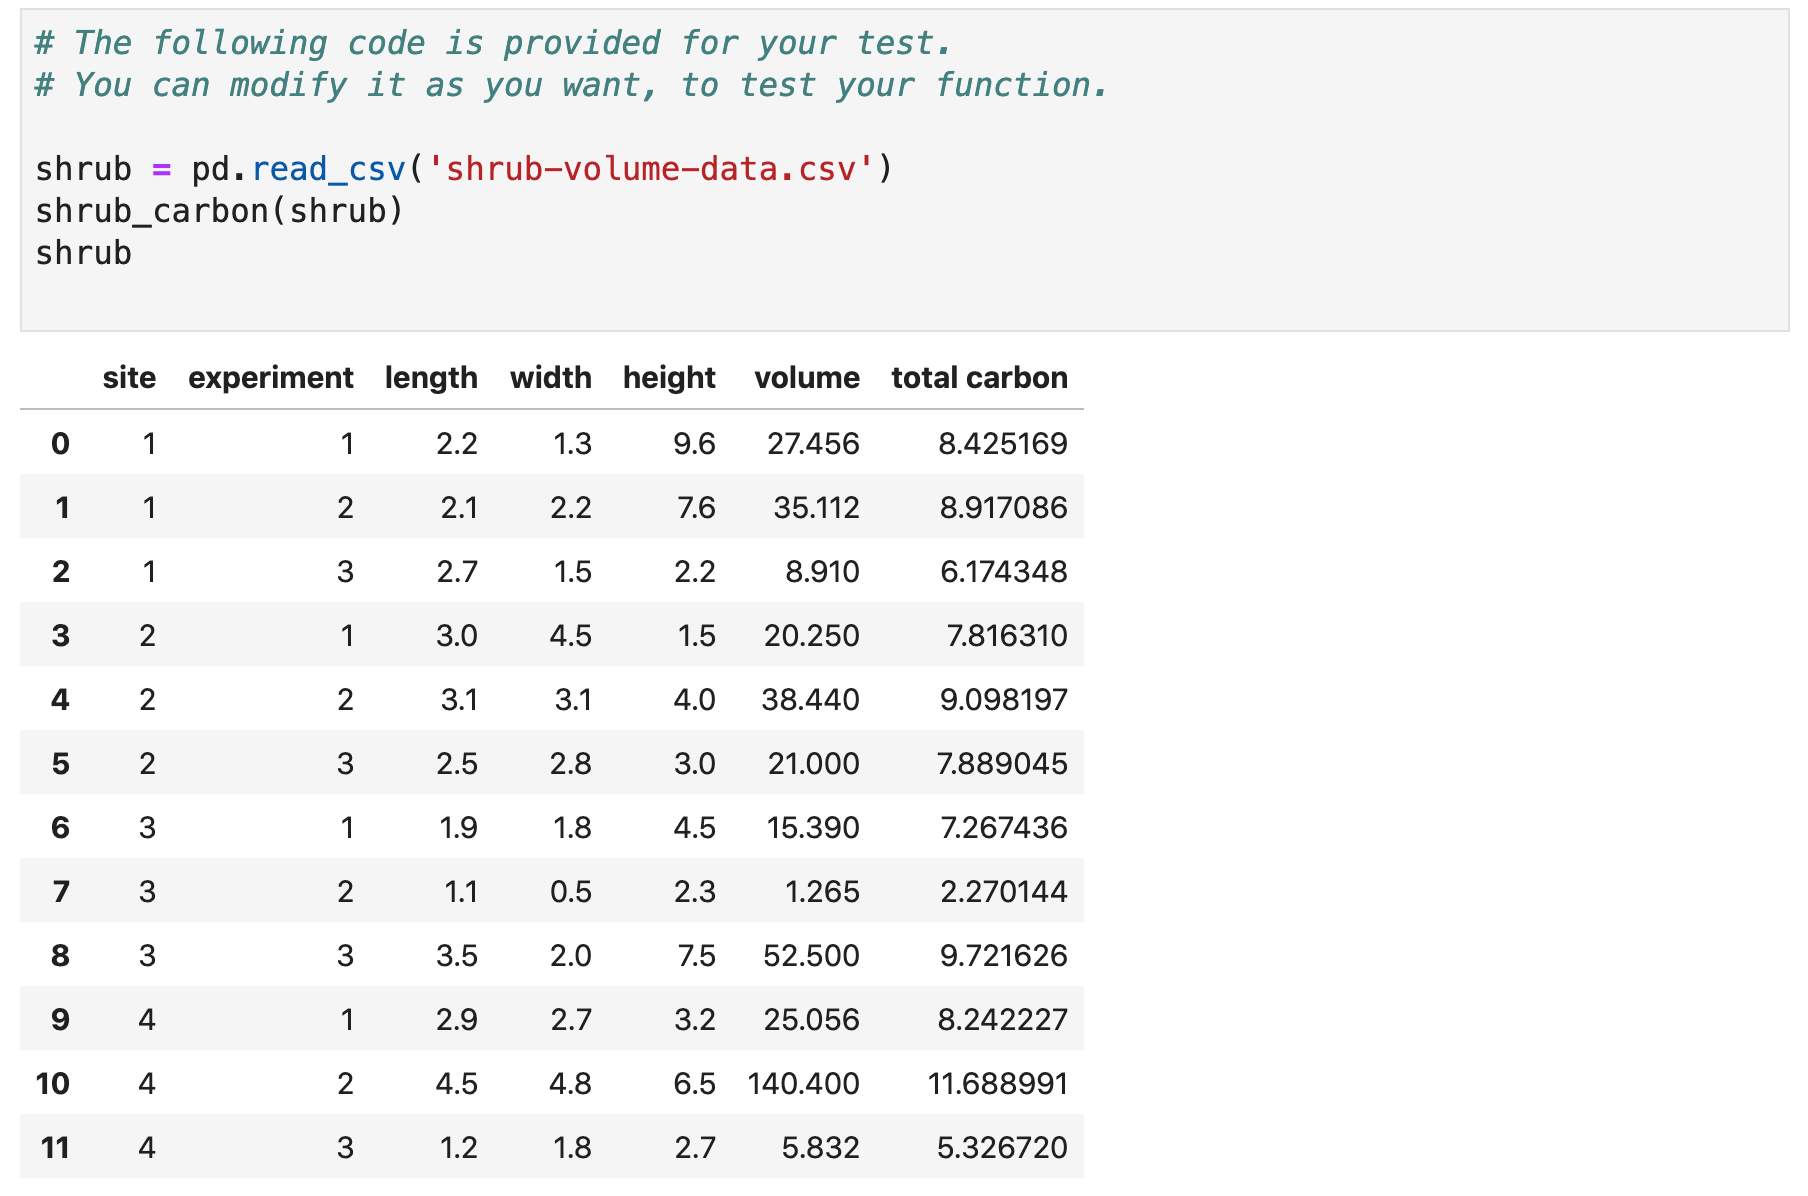

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_carbon(shrub):
    
    # Write code to add a new column, 'volume', to the dataframe 'shrub'
    shrub['volume'] = shrub.length * shrub.width * shrub.height

    
    # Write code to add a new column, 'shrub', to the dataframe 'shrub'
    # You need to use a numpy function 'log'
    shrub['total carbon'] = 1.8 + 2 * np.log(shrub.volume)

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub

---

#### Problem 3 (3 pt)

#### **Shrub classification**

The scientist wants to group the shrub data into three classes. If the height of a shrub is greater than or equal to 5, it should be classified as 'tall'. If it is less than 2, it should be classified as 'short'. Otherwise, it should be 'medium'.

Write a function, 'shrub_class', that classifies the shrub data and prints descriptive statistics of 'total carbon' for the each classes.

1. Make a new column named 'class'

2. Fill the elements of this new column with 'tall', 'medium', or 'short' depending on the height of each shrub.  (Hint: One way is to use conditional indexing.)

3. Print descriptive statistics of 'total carbon' for each of three classes, using `describe()` function.

The outcome of this problem should look like below:
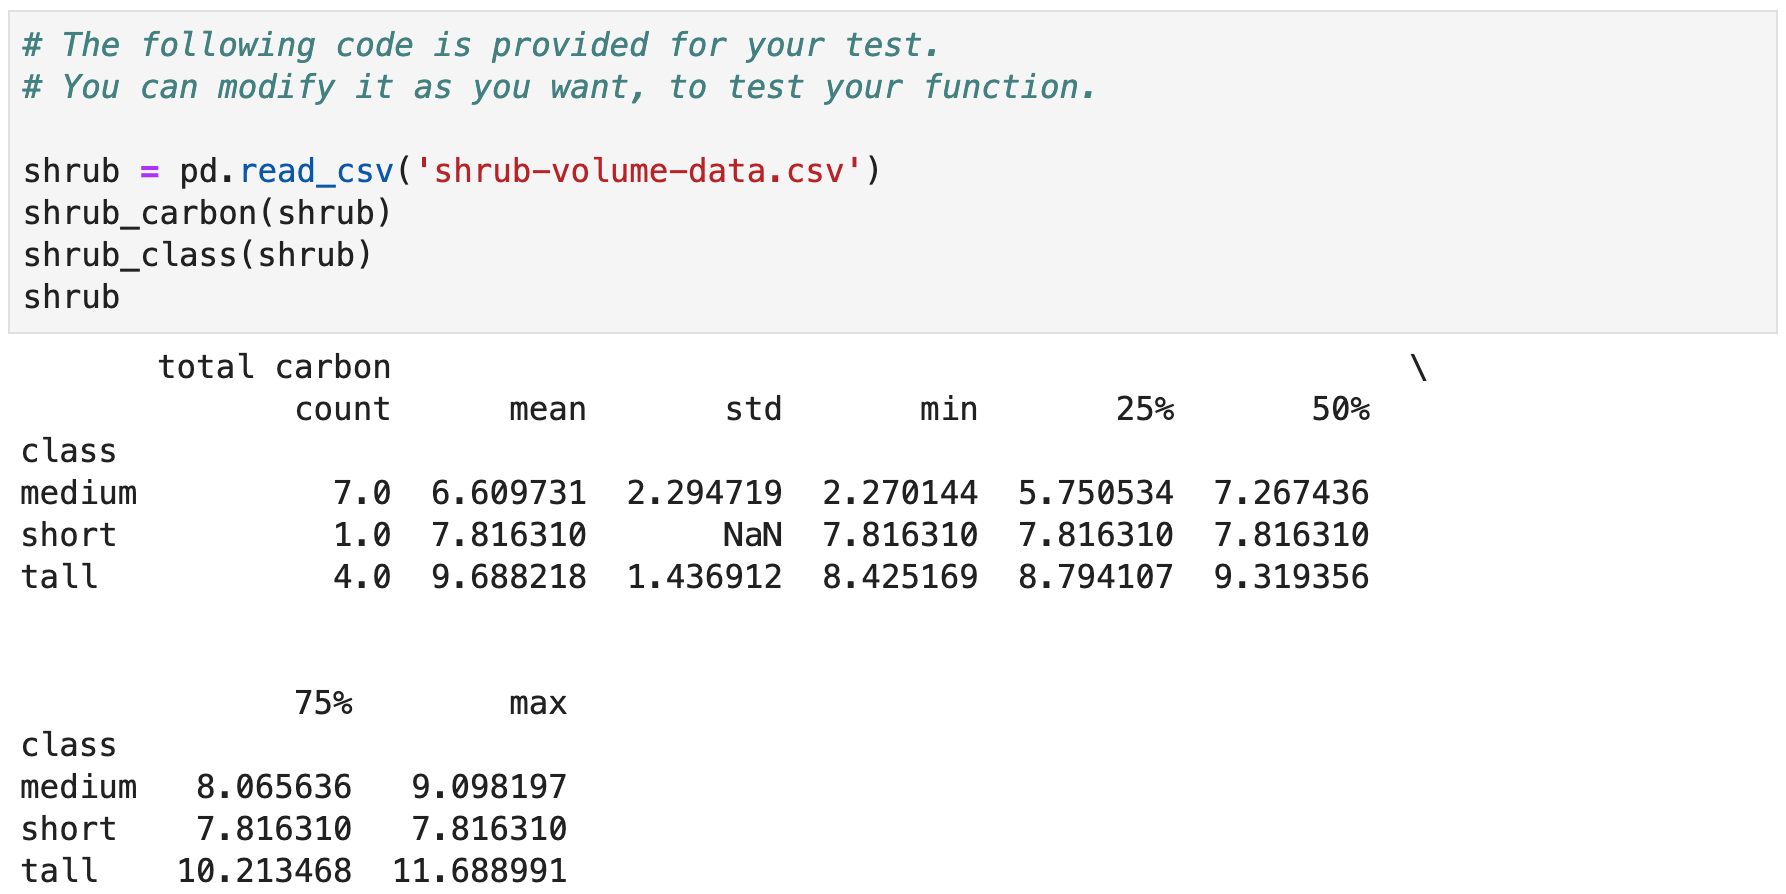 <br>
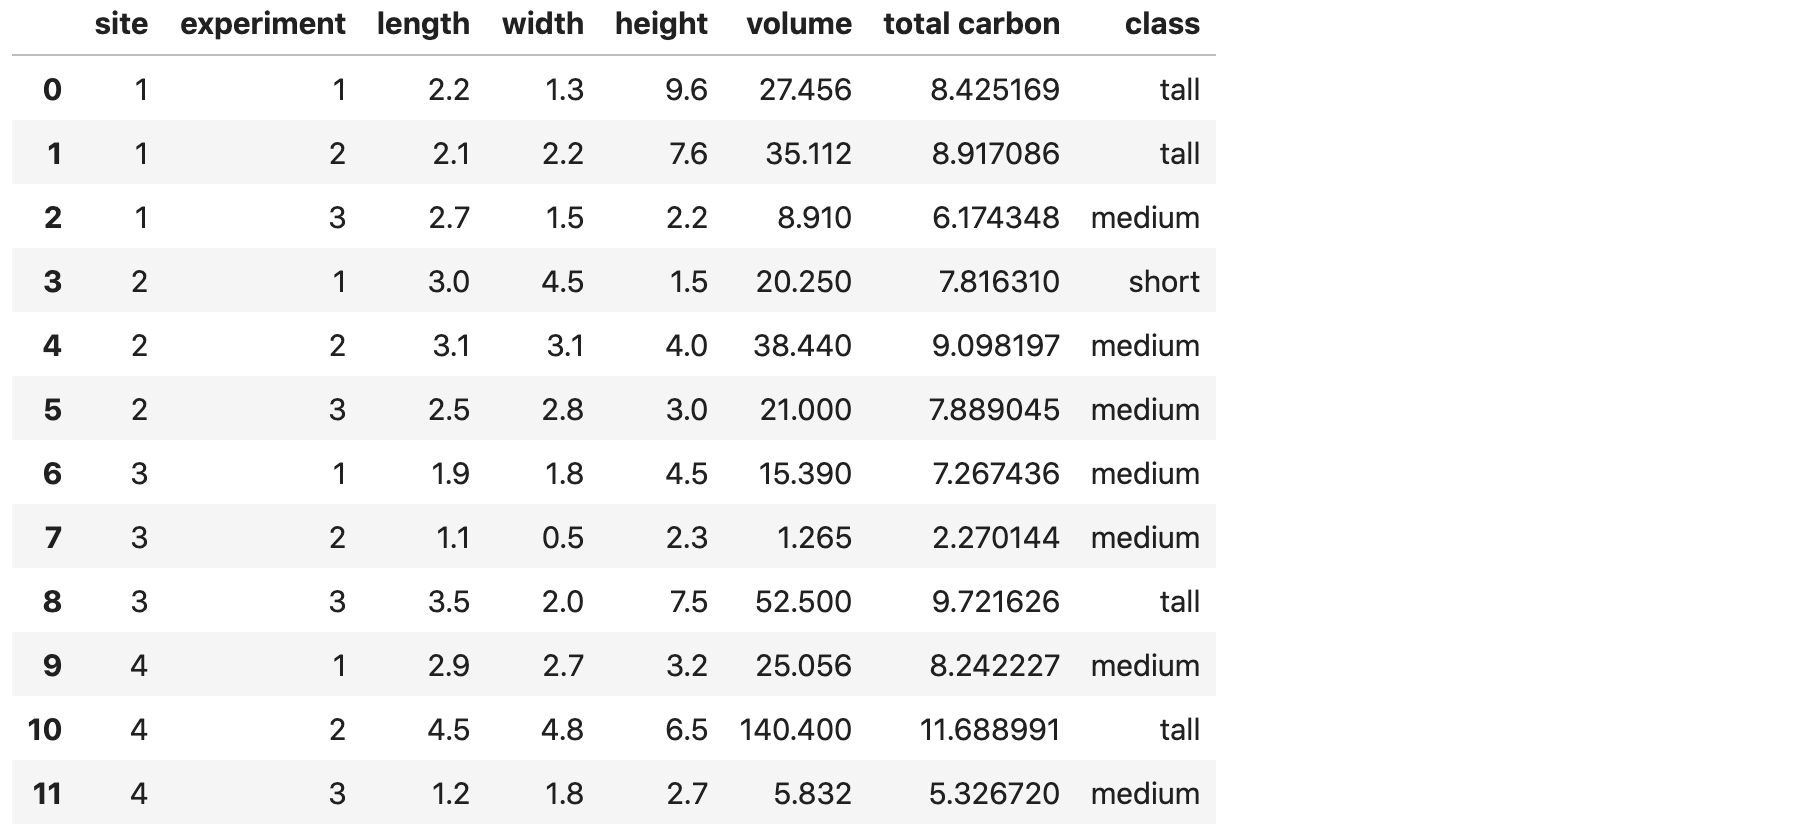

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_class(shrub):
    
    # You don't have to follow the suggestions below. This is one way of solving the problem.
    # Make a new column 'class' and fill it with np.nan
    shrub['class'] = np.nan
    
    # Fill the column with 'tall', 'medium', and 'short'. Use conditional indexing
    shrub.loc[  shrub.height>=5                          , 'class' ] = 'tall'
    shrub.loc[  (shrub.height<5) & (shrub.height>=2)     , 'class' ] = 'medium'
    shrub.loc[  shrub.height<2                           , 'class' ] = 'short'
    
    # Use 'describe()' function. But select only 'total carbon' for print.
    tmp = shrub.loc[:,['total carbon','class']].groupby('class').describe()
    print(tmp)


In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub_class(shrub)
shrub

---

#### Problem 4 (2 pt)  

#### **Shrub data plot**

Finally, write code to print the shrub data. X-axis should be 'length' and the Y-axis should be the 'total carbon'.  The color of each dot should be determined by the class. Dots for 'tall' should be 'red', dots for 'medium' should be 'blue', dots for 'short' should be 'cyan'.

The outcome of this problem should look like below:
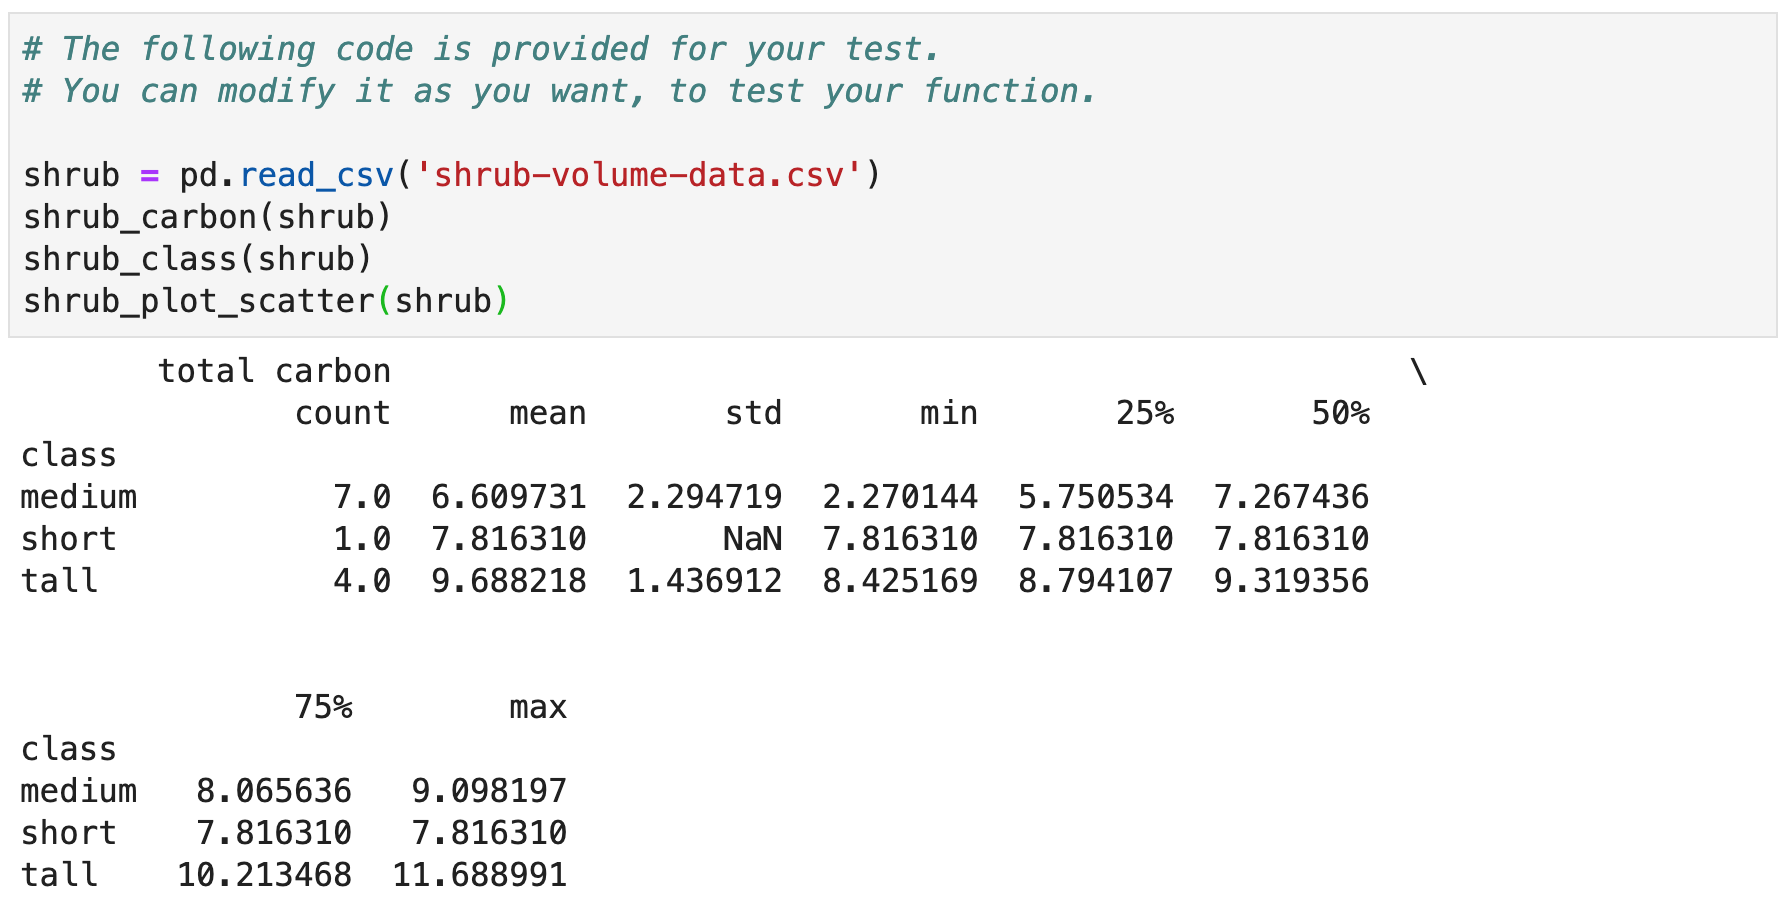 <br>
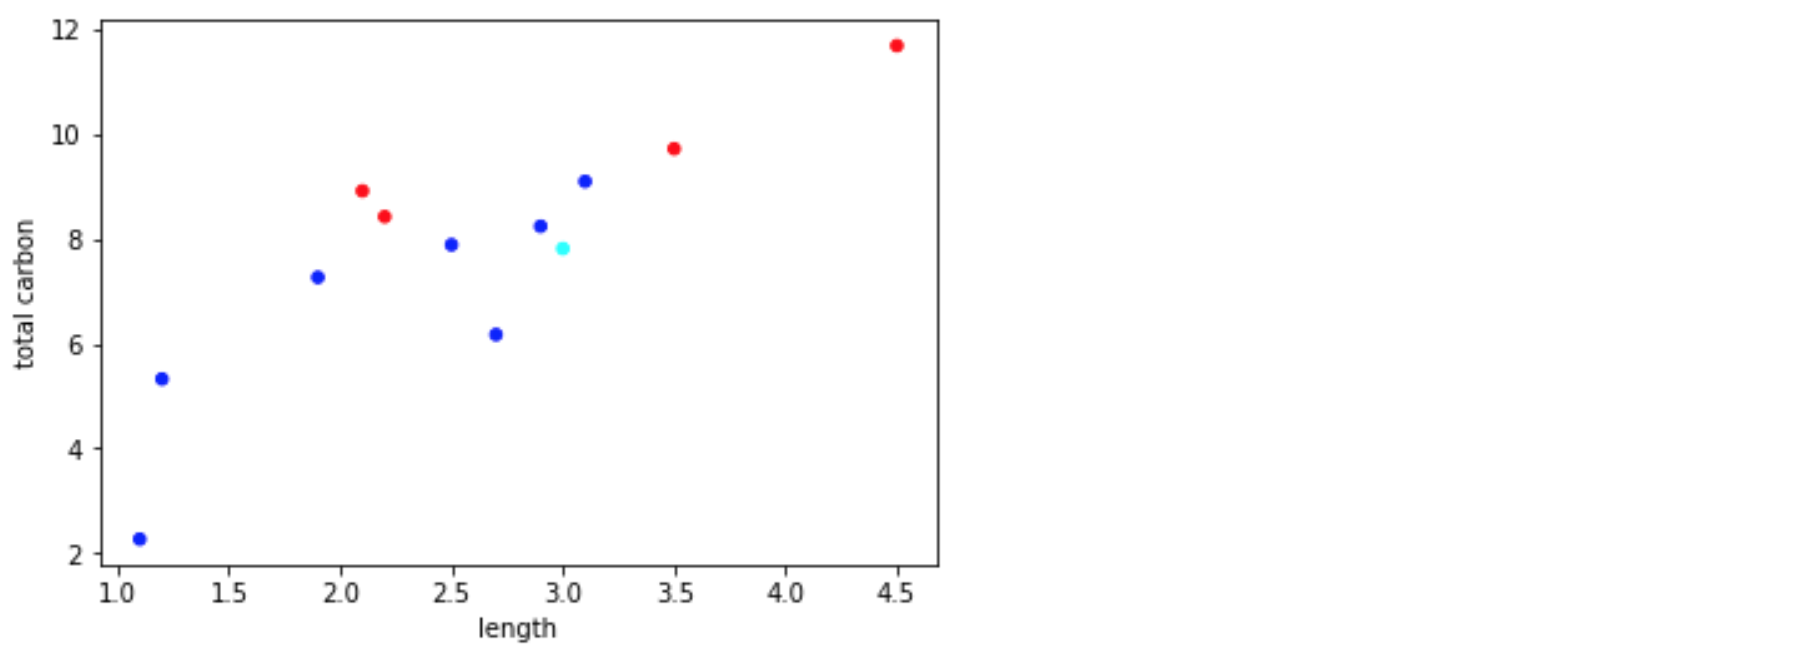

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_plot_scatter(shrub):
    
    # Copy the 'class' column to a variable 'color'
    color = shrub.loc[:,'class']
    
    # Replace 'tall', 'medium', and 'short' in 'color' to 'red', 'blue', and 'cyan'
    # Hint: You may want to use 'replace' function we used in the Breast Cancer data.
    color = color.replace(to_replace=['tall','medium','short'], value=['red', 'blue', 'cyan'])

    # Plot a scatter plot (You don't have to set the 's' argument. But you should set 'c' argument.)
    shrub.plot.scatter(x='length',y='total carbon',c=color)

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub_class(shrub)
shrub_plot_scatter(shrub)

---
## **Check your code before you commit and push your homework**

### If there is any error in your code, including any practice code you wrote to test your answers, your homework will not be scored.

#### Here are steps you must take to make sure there is no error in your script.
1. You must first restart the kernel. It is in the menu "kernel->Restart Kernel". Or click the restart button.
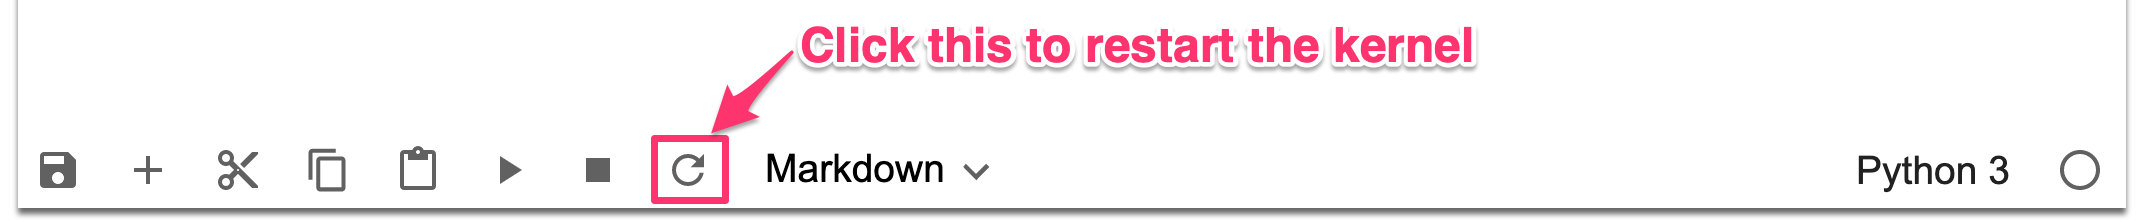
2. Run all cells. You can do this by clicking the menu "Run->Run all cells".
3. Fix any errors.
4. Repeate 1-3 until you don't see any errors.
5. **IMPORTNAT: Clear All Outputs (Right mouse click->Clear All Output)**
6. **IMPORTNAT: Save your file and change the filename to "HWn_Lastname_Firstname.ipynb"**
7. **Run the following cell and make sure you don't see any errors. This is the code that the TA or the instructor will use to generate testable code.**

In [ ]:
# If the name of the student is Abraham Lincoln, then the code should look
# like below.

!jupyter nbconvert --to script 'HW9_Lincoln_Abraham.ipynb'
import HW9_Lincoln_Abraham as hw  # Change this to your name
dir(hw)

# After running this code, you should see, at the bottom, the function names
# of your homework answers.

# If you see errors, please make sure the file names, module names are all
# properly set up. Then restart the kernel and try it again.
